In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
import seaborn as sns
%matplotlib inline 
#This line helped me draw the plot
#%matplotlib notebook

In [2]:
# Generating two points to construct the line
x1_targetf = np.random.uniform(-1,1,2)
x2_targetf = np.random.uniform(-1,1,2)

# Computing the slope m and the y-intercept b
m = (x2_targetf[1]-x2_targetf[0])/(x1_targetf[1]-x1_targetf[0])
b_target = x2_targetf[0] - m * x1_targetf[0]

# Computing the x2 value of the extremities of the line knowing that the x1 
# values range is [-1, 1]
x2_lefttargetf = m*(-1) + b_target
x2_righttargetf = m*(1) + b_target

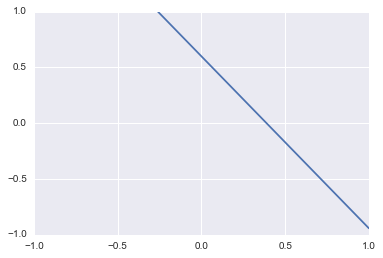

In [3]:
# Plot of target function
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot([-1,1], [x2_lefttargetf,x2_righttargetf])
ax1.axis((-1,1,-1,1))
plt.show()

In [4]:
# Generating N training data points
N = 25
x1_input = np.random.uniform(-1,1,N)
x2_input = np.random.uniform(-1,1,N)

In [5]:
y_output = []

# Computing the y_output (class or category) from the target function
for index, each in enumerate(x1_input):
    # Computing the value of x2 if it was on the line
    x2_line = m*(each) + b_target

    # Checking the value of x2 corresponding to that x1 with the x2 from the line
    # Assigning a -1 or +1 class to it
    if x2_input[index] < x2_line:
        y_output.append(-1.0)
    else:
        y_output.append(1.0)

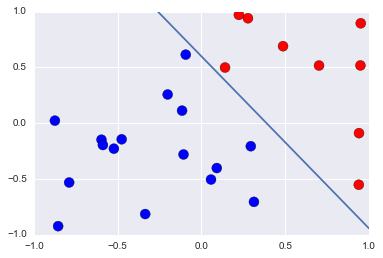

In [6]:
# Plotting the training points
plt.plot([-1,1], [x2_lefttargetf,x2_righttargetf])
plt.scatter(
    x1_input,
    x2_input,
    c=y_output,
    cmap='bwr',
    alpha=1, 
    s=100, 
    edgecolors='k'
    );
plt.axis((-1,1,-1,1))
plt.show()

In [7]:
# Combining the data vectors into an X matrix of N vectors of features
X_svm = np.column_stack((
    x1_input,
    x2_input
    ))
# Changing the class list into a Numpy array
y_output = np.array(y_output)
# Initializing the N x N Gram matrix
K = np.zeros(
    shape = (
        len(x1_input), 
        len(x1_input)
        )
    )

# Computing the inner products for each pair of vectors
for i in range(len(x1_input)):
    for j in range(len(x1_input)):
        K[i,j] = np.dot(X_svm[i], X_svm[j])

# Generating all the matrices and vectors
P = cvxopt.matrix(np.outer(y_output, y_output) * K)
q = cvxopt.matrix(np.ones(len(x1_input)) * -1)
G = cvxopt.matrix(np.vstack([
    np.eye(len(x1_input)) * -1,
    np.eye(len(x1_input))
    ]))
h = cvxopt.matrix(np.hstack([
    np.zeros(len(x1_input)),
    np.ones(len(x1_input)) * 999999999.0
    ])) 
A = cvxopt.matrix(y_output, (1,len(x1_input)))
b = cvxopt.matrix(0.0)

# Solving the QP problem
solution = cvxopt.solvers.qp(P, q, G, h, A, b)

# Display the Lagrange multipliers
a = np.ravel(solution['x'])
print a

# Create a boolean list of non-zero alphas
ssv = a > 1e-5
# Select the index of these alphas. They are the support vectors.
ind = np.arange(len(a))[ssv]
# Select the corresponding alphas a, support vectors sv and class labels sv_y
a = a[ssv]
sv = X_svm[ssv]
sv_y = y_output[ssv]

     pcost       dcost       gap    pres   dres
 0:  5.3683e+17 -1.2351e+19  2e+19  4e-01  2e-07
 1:  6.8684e+17 -1.4173e+18  2e+18  1e-03  9e+00
 2:  1.3422e+17 -1.9358e+17  3e+17  7e-05  6e-01
 3:  2.0241e+16 -2.6560e+16  5e+16  7e-09  1e-07
 4:  2.9337e+15 -3.3254e+15  6e+15  4e-08  4e-08
 5:  4.2185e+14 -4.7027e+14  9e+14  6e-08  2e-08
 6:  6.0521e+13 -6.6834e+13  1e+14  3e-08  6e-09
 7:  8.6763e+12 -9.5528e+12  2e+13  8e-10  2e-09
 8:  1.2435e+12 -1.3675e+12  3e+12  3e-09  9e-10
 9:  1.7820e+11 -1.9589e+11  4e+11  2e-10  3e-10
10:  2.5536e+10 -2.8067e+10  5e+10  2e-10  1e-10
11:  3.6592e+09 -4.0219e+09  8e+09  2e-10  4e-11
12:  5.2432e+08 -5.7635e+08  1e+09  9e-11  2e-11
13:  7.5121e+07 -8.2601e+07  2e+08  5e-12  8e-12
14:  1.0760e+07 -1.1841e+07  2e+07  2e-12  3e-12
15:  1.5400e+06 -1.6987e+06  3e+06  2e-12  8e-13
16:  2.1998e+05 -2.4412e+05  5e+05  3e-14  4e-13
17:  3.1250e+04 -3.5249e+04  7e+04  3e-13  1e-13
18:  4.3680e+03 -5.1559e+03  1e+04  2e-14  7e-14
19:  5.7585e+02 -7.82

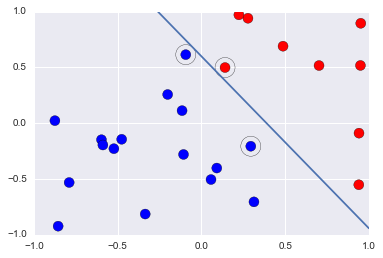

In [8]:
# Plotting the support vectors
plt.scatter(
    sv[:,0],
    sv[:,1],
    facecolors='none',
    s=400, 
    edgecolors='k'
    )
plt.plot([-1,1], [x2_lefttargetf,x2_righttargetf])
plt.scatter(
    x1_input,
    x2_input,
    c=y_output,
    cmap='bwr',
    alpha=1, 
    s=100, 
    edgecolors='k'
    );
plt.axis((-1,1,-1,1))
plt.show()

w_svm: [ 11.11052364   5.25937406]
b_svm: -3.18799755137


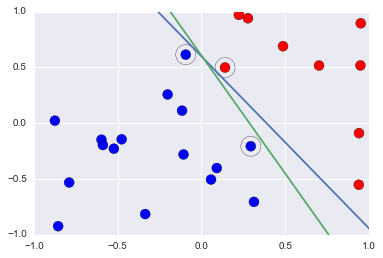

In [9]:
# Computing the weights w_svm
w_svm = np.zeros(X_svm.shape[1])

for each in range(len(a)):
    w_svm += a[each] * sv_y[each] * sv[each]
print 'w_svm:', w_svm

# Computing the intercept b_svm
b_svm = sv_y[0] - np.dot(w_svm, sv[0])
print 'b_svm:', b_svm

# Plot of SVM function
x2_lefttargeth = -(w_svm[0]*(-1)+b_svm)/w_svm[1]
x2_righttargeth = -(w_svm[0]*(1)+b_svm)/w_svm[1]

plt.plot([-1,1], [x2_lefttargetf,x2_righttargetf])
plt.plot([-1,1], [x2_lefttargeth,x2_righttargeth])

plt.scatter(
    sv[:,0],
    sv[:,1],
    facecolors='none',
    s=400, 
    edgecolors='k'
    )

plt.scatter(
    x1_input,
    x2_input,
    c=y_output,
    cmap='bwr',
    alpha=1, 
    s=100, 
    edgecolors='k'
    );
plt.axis((-1,1,-1,1))
plt.show()